In [1]:
!mkdir -p ~/.kaggle
!wget -O kaggle.json "https://www.dropbox.com/scl/fi/gtvh1ukw51cfmcgsrmaf4/kaggle-5.json?rlkey=0k0t2hbtblgzrzewuculf59b6&st=2mw6ybyv&dl=0"

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dimensi0n/imagenet-256 -p ./ --unzip


--2025-06-19 15:52:31--  https://www.dropbox.com/scl/fi/gtvh1ukw51cfmcgsrmaf4/kaggle-5.json?rlkey=0k0t2hbtblgzrzewuculf59b6&st=2mw6ybyv&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uced7a06c65d67907f562206b8df.dl.dropboxusercontent.com/cd/0/inline/Cr7oCxP6HJdqfhYv7ztVConDrmi3e1r0HV1ly4DBwaLwpr87mnYe0_Ll2vu6o9EYcwDRXcMkQ1EcgyfFSouIDr1TjyNHGk6vgK-jy_RCR3YolG6dUyW7XvGvF4GrT6L6gjAp4unEow_Hb9YWse3PbSC8/file# [following]
--2025-06-19 15:52:32--  https://uced7a06c65d67907f562206b8df.dl.dropboxusercontent.com/cd/0/inline/Cr7oCxP6HJdqfhYv7ztVConDrmi3e1r0HV1ly4DBwaLwpr87mnYe0_Ll2vu6o9EYcwDRXcMkQ1EcgyfFSouIDr1TjyNHGk6vgK-jy_RCR3YolG6dUyW7XvGvF4GrT6L6gjAp4unEow_Hb9YWse3PbSC8/file
Resolving uced7a06c65d67907f562206b8df.dl.dropboxusercontent.com (uced7a06c65d67907f562206b8df.dl.dropboxusercontent.com)...

In [2]:
import glob
import os

# Find all .jpg images inside subfolders of /content/
image_files = glob.glob('/content/*/*.jpg')
print(f"Total images found: {len(image_files)}")


Total images found: 539826


# Applying watermark

In [3]:
!wget https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m&st=ddrylotw&dl=0
!mv /content/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m arial.ttf

--2025-06-19 15:58:48--  https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2e2c68eed38de9970fd780061d.dl.dropboxusercontent.com/cd/0/inline/Cr65kM-oE8n5c3j-5ZgvaWwdMGZSHn7Uoy19A7N_FsDzsnN_TQoH1MVgp77bHtRJNQm4X20O2OCZpdqBALY8_ATlRgOf69mUdyxCDBPQvvZoMbHsakEXB9pdLT1ukHzmldvS_ZPU2Uy-eqeCaas7vRzJ/file# [following]
--2025-06-19 15:58:49--  https://uc2e2c68eed38de9970fd780061d.dl.dropboxusercontent.com/cd/0/inline/Cr65kM-oE8n5c3j-5ZgvaWwdMGZSHn7Uoy19A7N_FsDzsnN_TQoH1MVgp77bHtRJNQm4X20O2OCZpdqBALY8_ATlRgOf69mUdyxCDBPQvvZoMbHsakEXB9pdLT1ukHzmldvS_ZPU2Uy-eqeCaas7vRzJ/file
Resolving uc2e2c68eed38de9970fd780061d.dl.dropboxusercontent.com (uc2e2c68eed38de9970fd780061d.dl.dropboxusercontent.com)... 162.125.80.15, 2620:

In [35]:
import os
import shutil
import glob
import random
from PIL import Image, ImageDraw, ImageFont, UnidentifiedImageError
from tqdm import tqdm

# Base paths
base_dir = '/content/imagenet_dataset'
watermark_folder = os.path.join(base_dir, 'watermark')
no_watermark_folder = os.path.join(base_dir, 'no_watermark')
with_watermark_folder = os.path.join(base_dir, 'with_watermark')

# Create folders
os.makedirs(watermark_folder, exist_ok=True)
os.makedirs(no_watermark_folder, exist_ok=True)
os.makedirs(with_watermark_folder, exist_ok=True)

# Step 1: Load up to 500 .jpg images per class folder from /content/
content_root = '/content'
class_folders = [f for f in os.listdir(content_root) if os.path.isdir(os.path.join(content_root, f))]
image_list = []

for class_folder in class_folders:
    full_path = os.path.join(content_root, class_folder)
    images = glob.glob(os.path.join(full_path, '*.jpg'))[:500]
    image_list.extend(images)

print(f"✅ Total selected images from all folders : {len(image_list)}")

# Step 2: Shuffle and split into two halves
random.shuffle(image_list)
half_point = len(image_list) // 2

# Step 3: Copy files to watermark and no_watermark folders
for file in image_list[:half_point]:
    try:
        shutil.copy(file, os.path.join(watermark_folder, os.path.basename(file)))
    except Exception as e:
        print(f"⚠️ Failed to copy {file}: {e}")

for file in image_list[half_point:]:
    try:
        shutil.copy(file, os.path.join(no_watermark_folder, os.path.basename(file)))
    except Exception as e:
        print(f"⚠️ Failed to copy {file}: {e}")



✅ Total selected images from all folders : 468834


In [ ]:
# Step 4: Arabic watermark text options
watermarks = ["إبداع", "أمل", "نور", "فكرة", "حلم", "نجاح", "شغف", "مستقبل", "أفق", "تطور"]

# Step 5: Function to apply watermark
def apply_random_watermarks(image_path, watermark_text, output_path, spots):
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGBA')
            watermark_img = Image.new('RGBA', img.size, (0, 0, 0, 0))
            draw = ImageDraw.Draw(watermark_img)
            width, height = img.size

            for _ in range(spots):
                font_size = random.randint(width // 30, width // 12)
                try:
                    font = ImageFont.truetype("arial.ttf", font_size)
                except IOError:
                    font = ImageFont.load_default()

                text_bbox = draw.textbbox((0, 0), watermark_text, font=font)
                text_width = text_bbox[2] - text_bbox[0]
                text_height = text_bbox[3] - text_bbox[1]
                x = random.randint(0, width - text_width - 1)
                y = random.randint(0, height - text_height - 1)
                draw.text((x, y), watermark_text, font=font, fill=(255, 255, 255, 170))

            watermarked_img = Image.alpha_composite(img, watermark_img)
            watermarked_img.convert('RGB').save(output_path, "JPEG")
    except UnidentifiedImageError:
        print(f"⚠️ Skipping unreadable file: {image_path}")
    except Exception as e:
        print(f"⚠️ Error processing {image_path}: {e}")

# Step 6: Apply watermarks to all images in watermark folder

for file in tqdm(os.listdir(watermark_folder)):
    input_path = os.path.join(watermark_folder, file)
    output_path = os.path.join(with_watermark_folder, file)
    if os.path.isfile(input_path):
        text = random.choice(watermarks)
        spots = random.randint(1, 3)
        apply_random_watermarks(input_path, text, output_path, spots)




100%|██████████| 5000/5000 [03:36<00:00, 23.06it/s]


# Preprocessing

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import UnidentifiedImageError

def load_images(directory, size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        try:
            image = load_img(path,target_size=size) #RGB
            image = img_to_array(image) / 255.0  # Normalize to [0,1]
            images.append(image)
        except (UnidentifiedImageError, OSError) as e:
            print(f"⚠️ Skipping unreadable image: {filename} - {e}")
    return np.array(images)

# ✅ Adjusted paths to match ImageNet folder structure
watermark_path = '/content/imagenet_dataset/with_watermark/'
no_watermark_path = '/content/imagenet_dataset/no_watermark/'

# Load the datasets
watermarked_images = load_images(watermark_path)
clean_images = load_images(no_watermark_path)



In [38]:
watermarked_images.shape

(2500, 256, 256, 3)


In [39]:
clean_images.shape


(2500, 256, 256, 3)


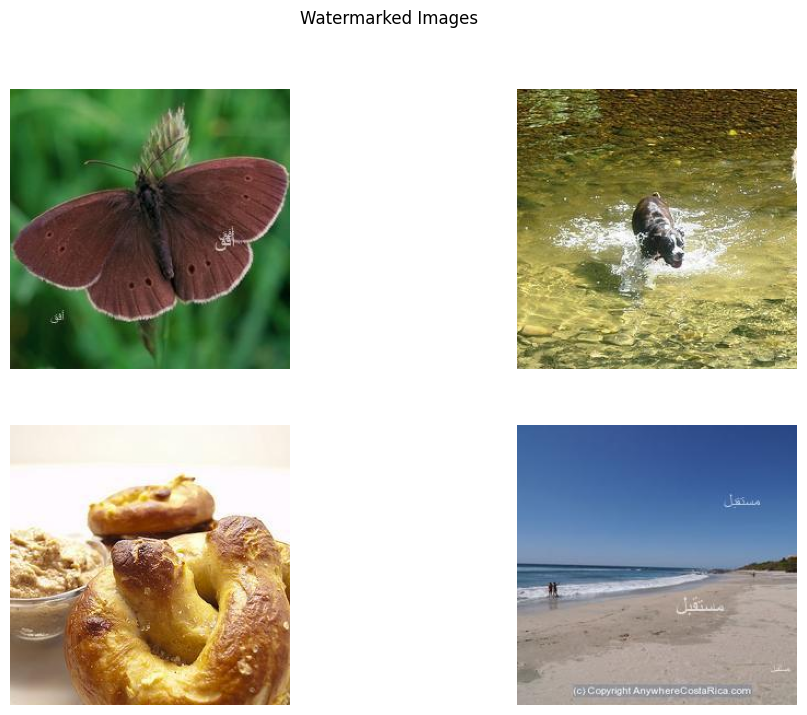

In [9]:
def show_images(images, title=""):
    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i])  # No reshaping or cmap
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(watermarked_images, title="Watermarked Images")


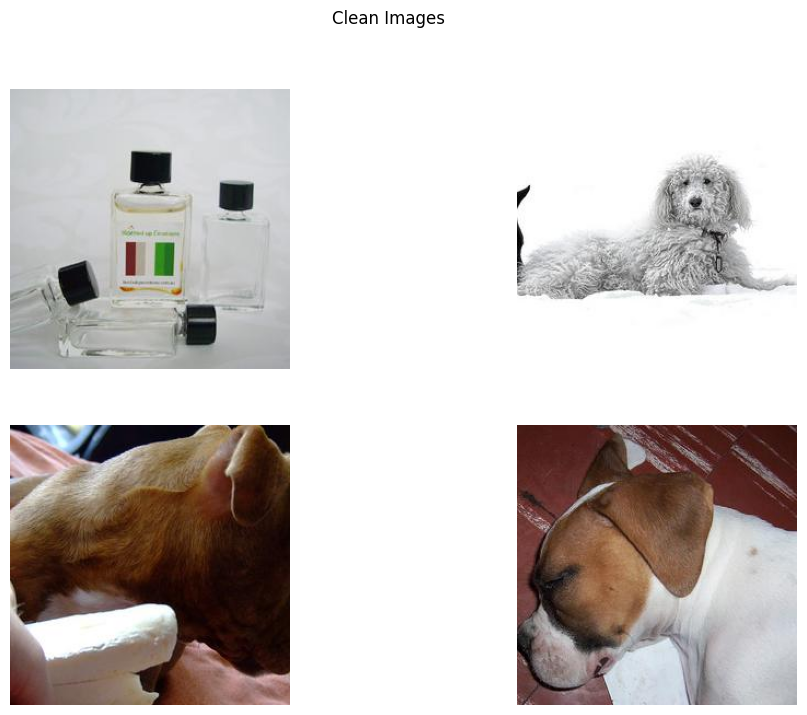

In [10]:
show_images(clean_images, title="Clean Images")

# GAN

In [24]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Flatten, Dense, Reshape, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

def build_generator():
    noise = Input(shape=(256, 256, 3))  # RGB input
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(noise)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(3, (3, 3), padding='same')(x)  # Output is RGB
    x = Activation('tanh')(x)
    model = Model(inputs=noise, outputs=x)
    return model

def build_discriminator():
    image = Input(shape=(256, 256, 3))  # RGB input
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(image)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=image, outputs=x)
    return model

generator = build_generator()
discriminator = build_discriminator()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [25]:
# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

# Combined model (generator + discriminator)
z = Input(shape=(256, 256, 3))  # input for generator
img = generator(z)
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

In [ ]:
def train(epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):
        # Sample a batch of images
        idx = np.random.randint(0, watermarked_images.shape[0], batch_size)
        real_imgs = clean_images[idx]
        watermarked_imgs = watermarked_images[idx]

        # Generate a batch of new images
        gen_imgs = generator.predict(watermarked_imgs)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        g_loss = combined.train_on_batch(watermarked_imgs, [np.ones((batch_size, 1)), real_imgs])

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

train(epochs=200000, batch_size=32, save_interval=1000)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
Epoch 47000 [D loss: 0.015348488464951515, acc.: 100.0] [G loss: [6.141371726989746, 6.139333724975586, 0.0020380790811032057]]
1/1 [==============================] - 0s 21ms/step
Epoch 48000 [D loss: 0.02681651571765542, acc.: 100.0] [G loss: [5.7245588302612305, 5.723352909088135, 0.0012059869477525353]]
1/1 [==============================] - 0s 22ms/step
Epoch 49000 [D loss: 0.028792187571525574, acc.: 100.0] [G loss: [6.106972694396973, 6.104373931884766, 0.0025989541318267584]]
1/1 [==============================] - 0s 22ms/step
Epoch 50000 [D loss: 0.058004907332360744, acc.: 98.4375] [G loss: [6.085700035095215, 6.08370304107666, 0.001996937207877636]]
1/1 [==============================] - 0s 22ms/step
Epoch 51000 [D loss: 0.022085692267864943, acc.: 100.0] [G loss: [6.772048473358154, 6.770298480987549, 0.0017500094836577773]]
1/1 [==============================] - 0s 21ms/st

KeyboardInterrupt: 

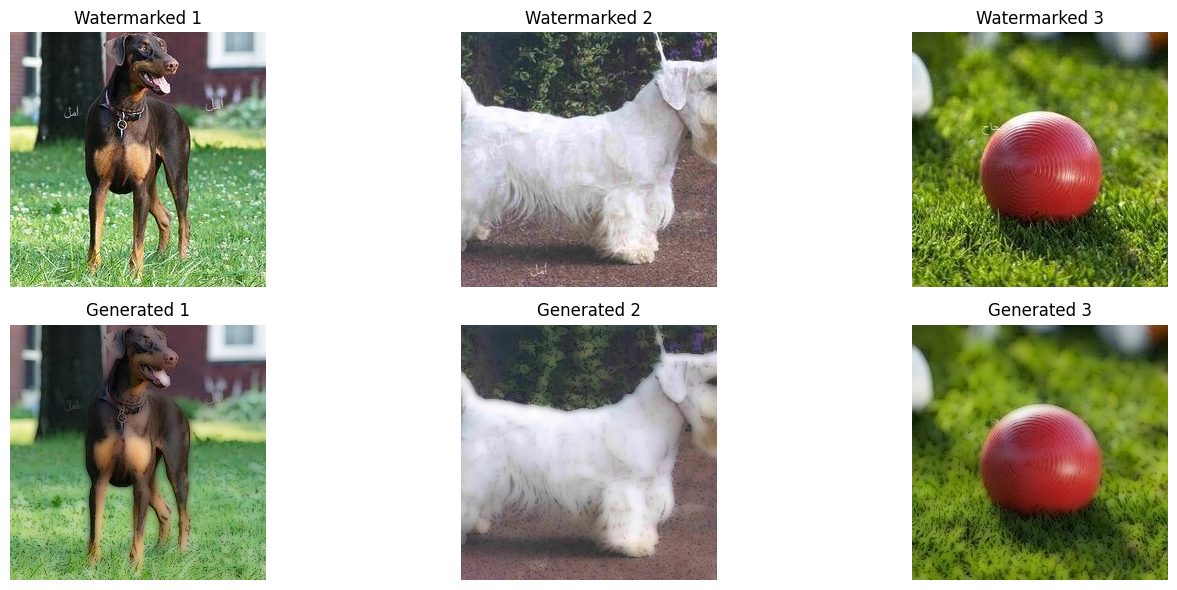

In [12]:
# Plot comparison of images
def plot_comparison(watermarked, clean, generated, n=3):
    plt.figure(figsize=(15, 10))
    for i in range(n):
        # Watermarked
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(watermarked[i])
        ax.set_title("Watermarked")
        ax.axis('off')


        # Generated (predicted clean)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(generated[i])
        ax.set_title("Generated")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Select samples to visualize
idx = np.random.randint(0, watermarked_images.shape[0], 3)
sample_watermarked = watermarked_images[idx]
sample_clean = clean_images[idx]
sample_generated = generator.predict(sample_watermarked)

# Show side-by-side comparison
plot_comparison(sample_watermarked, sample_clean, sample_generated)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction))
        ssim_values.append(ssim(original, prediction))

    average_rmse = np.mean(rmse_values)
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    return average_rmse, average_psnr, average_ssim

# Generate predictions for the entire test set
test_watermarked = watermarked_images  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator.predict(test_watermarked)

# Calculate metrics for the entire test set
average_rmse, average_psnr, average_ssim = calculate_metrics(test_clean, test_generated)

In [13]:

print("Average RMSE:", average_rmse)
print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)


Average RMSE: 0.0399131770340269
Average PSNR: 26.98822665574256
Average SSIM: 0.8952901124526091


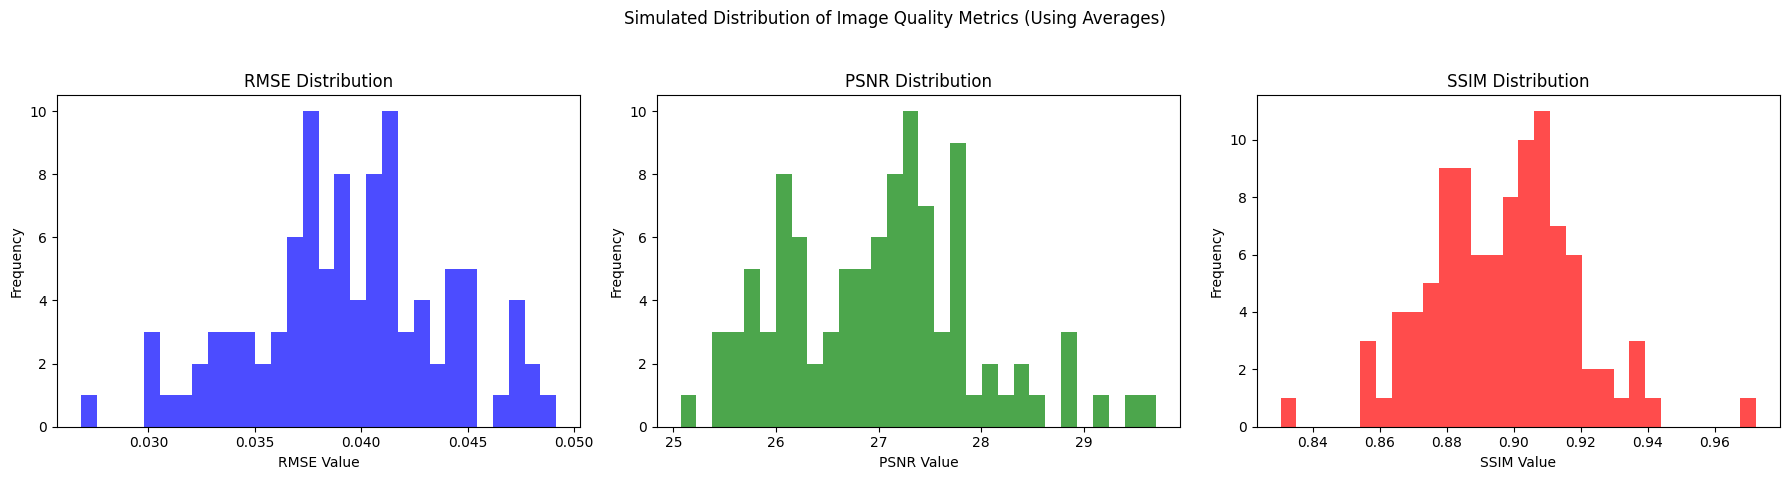

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction, data_range=1.0))  # <-- Fix here
        ssim_values.append(ssim(original, prediction, data_range=1.0))  # <-- And here

    return rmse_values, psnr_values, ssim_values


# Generate predictions for the entire test set
test_watermarked = watermarked_images  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator.predict(test_watermarked)

# Calculate metrics for the entire test set
rmse_values, psnr_values, ssim_values = calculate_metrics(test_clean, test_generated)

# Plotting histograms for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Image Quality Metrics Across the Test Set')

# RMSE Histogram
axes[0].hist(rmse_values, bins=30, color='blue', alpha=0.7)
axes[0].set_title('RMSE Distribution')
axes[0].set_xlabel('RMSE Value')
axes[0].set_ylabel('Frequency')

# PSNR Histogram
axes[1].hist(psnr_values, bins=30, color='green', alpha=0.7)
axes[1].set_title('PSNR Distribution')
axes[1].set_xlabel('PSNR Value')
axes[1].set_ylabel('Frequency')

# SSIM Histogram
axes[2].hist(ssim_values, bins=30, color='red', alpha=0.7)
axes[2].set_title('SSIM Distribution')
axes[2].set_xlabel('SSIM Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




# Attention mechanism

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Flatten, Dense, Reshape, Conv2DTranspose, Activation, Dropout, Layer, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Define the custom SelfAttention layer
class SelfAttention(Layer):
    def __init__(self, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.query = Dense(input_shape[-1])
        self.key = Dense(input_shape[-1])
        self.value = Dense(input_shape[-1])
        super(SelfAttention, self).build(input_shape)

    def call(self, inputs):
        q = self.query(inputs)
        k = self.key(inputs)
        v = self.value(inputs)

        attention = tf.matmul(q, k, transpose_b=True)
        attention = tf.nn.softmax(attention, axis=-1)
        attended = tf.matmul(attention, v)

        return attended + inputs  # Skip connection

    def compute_output_shape(self, input_shape):
        return input_shape

In [ ]:
def build_generator():
    noise = Input(shape=(256, 256, 3))
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(noise)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = SelfAttention()(x)  # Add attention

    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2D(3, (3, 3), padding='same')(x)  # Output layer adjusted to output RGB images
    x = Activation('tanh')(x)
    model = Model(inputs=noise, outputs=x)
    return model

In [ ]:
def build_discriminator():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    image_input = Input(shape=(256, 256, 3))
    x = base_model(image_input)
    x = SelfAttention()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=image_input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Create the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

# Generator takes noise as input and generates imgs
z = Input(shape=(256, 256, 3))
img = generator(z)

# For the combined model, we will only train the generator
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
<ipython-input-28-bcb77ab44354>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
import numpy as np

def preprocess_images(images):
    if images.shape[-1] == 1:  # Check if the images are grayscale
        images = np.concatenate([images, images, images], axis=-1)  # Convert grayscale to RGB by duplicating channels
    return images

def train(epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):
        # Sample a batch of images
        idx = np.random.randint(0, watermarked_images.shape[0], batch_size)
        real_imgs = preprocess_images(clean_images[idx])
        watermarked_imgs = preprocess_images(watermarked_images[idx])

        # Generate a batch of new images
        gen_imgs = generator.predict(watermarked_imgs)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        g_loss = combined.train_on_batch(watermarked_imgs, [np.ones((batch_size, 1)), real_imgs])

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

train(epochs=100000, batch_size=32, save_interval=1000)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step
Epoch 5100 [D loss: 0.14798536524176598, acc.: 93.75] [G loss: [8.286031723022461, 8.260478973388672, 0.02555253356695175]]
1/1 [==============================] - 0s 33ms/step
Epoch 5200 [D loss: 0.06480209529399872, acc.: 100.0] [G loss: [10.730391502380371, 10.702649116516113, 0.02774229273200035]]
1/1 [==============================] - 0s 30ms/step
Epoch 5300 [D loss: 0.11218388378620148, acc.: 93.75] [G loss: [5.8270134925842285, 5.793867111206055, 0.033146247267723083]]
1/1 [==============================] - 0s 30ms/step
Epoch 5400 [D loss: 0.02605554275214672, acc.: 98.4375] [G loss: [12.14592456817627, 12.11821174621582, 0.02771289460361004]]
1/1 [==============================] - 0s 29ms/step
Epoch 5500 [D loss: 0.12270626425743103, acc.: 95.3125] [G loss: [4.9379119873046875, 4.908025741577148, 0.02988637611269951]]
1/1 [==============================] - 0s 30ms/step
Epoch 56

In [ ]:
# Save the trained models
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')
combined.save('combined_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Create the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy']) # Remove this line
discriminator.trainable = False

# Generator takes noise as input and generates imgs
z = Input(shape=(256, 256, 3))
img = generator(z)

# For the combined model, we will only train the generator
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

<ipython-input-28-bcb77ab44354>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [ ]:
from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the directory path you want to create
gan_dir = '/content/drive/MyDrive/GAN_AR'

# Step 3: Create the directory if it doesn't exist
os.makedirs(gan_dir, exist_ok=True)

# Step 4: Confirm it's created
print(f"Directory created or already exists at: {gan_dir}")
!ls "$gan_dir"

Mounted at /content/drive
Directory created or already exists at: /content/drive/MyDrive/GAN_AR


In [ ]:
# Save models in the local Colab environment
generator.save('/content/generator_model.h5')
discriminator.save('/content/discriminator_model.h5')
combined.save('/content/combined_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Only needed if you used SelfAttention in your architecture
generator_loaded = load_model('/content/generator_model.h5',
                              custom_objects={'SelfAttention': SelfAttention},
                              compile=False)

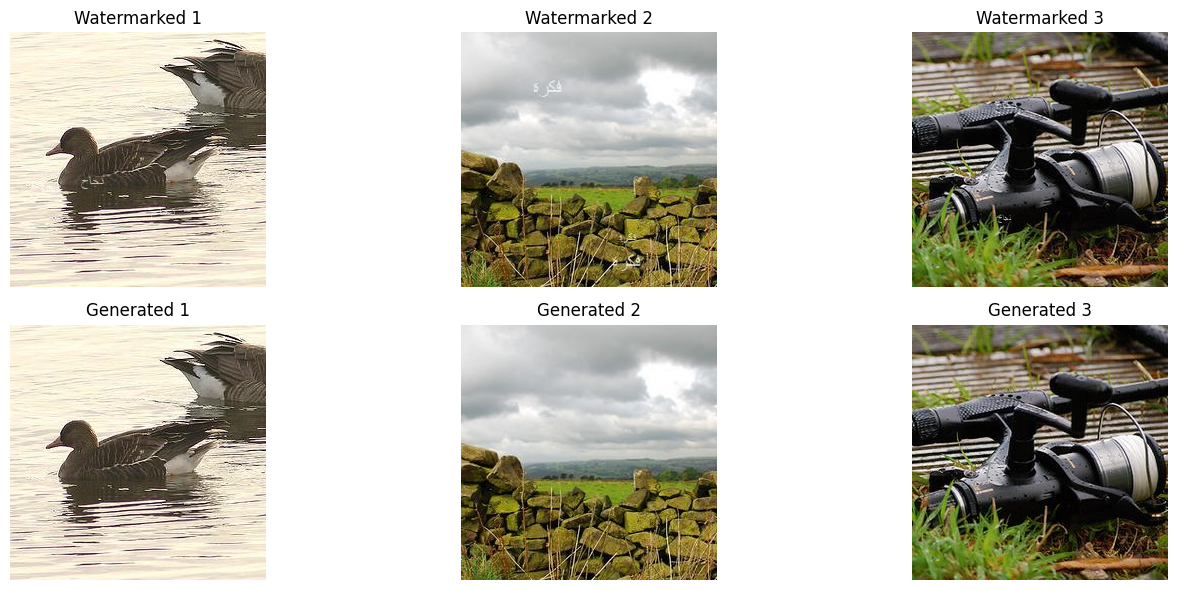

In [44]:
import os
import random
from PIL import Image, ImageDraw, ImageFont, UnidentifiedImageError
import matplotlib.pyplot as plt

# Paths
no_watermark_path = '/content/imagenet_dataset/no_watermark/'
temp_watermark_output = '/content/temp_watermarked_preview/'
os.makedirs(temp_watermark_output, exist_ok=True)

# Arabic watermark options
watermarks = ["إبداع", "أمل", "نور", "فكرة", "حلم", "نجاح", "شغف", "مستقبل", "أفق", "تطور"]

# Watermarking function
def apply_random_watermarks(image_path, watermark_text, output_path, spots):
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGBA')
            watermark_img = Image.new('RGBA', img.size, (0, 0, 0, 0))
            draw = ImageDraw.Draw(watermark_img)
            width, height = img.size

            for _ in range(spots):
                font_size = random.randint(width // 30, width // 12)
                try:
                    font = ImageFont.truetype("arial.ttf", font_size)
                except IOError:
                    font = ImageFont.load_default()

                text_bbox = draw.textbbox((0, 0), watermark_text, font=font)
                text_width = text_bbox[2] - text_bbox[0]
                text_height = text_bbox[3] - text_bbox[1]
                x = random.randint(0, width - text_width - 1)
                y = random.randint(0, height - text_height - 1)
                draw.text((x, y), watermark_text, font=font, fill=(255, 255, 255, 170))

            watermarked_img = Image.alpha_composite(img, watermark_img)
            watermarked_img.convert('RGB').save(output_path, "JPEG")
    except UnidentifiedImageError:
        print(f"⚠️ Skipping unreadable file: {image_path}")
    except Exception as e:
        print(f"⚠️ Error processing {image_path}: {e}")

# Step 1: Choose 3 random clean images
image_files = [f for f in os.listdir(no_watermark_path) if f.endswith('.jpg')]
selected_files = random.sample(image_files, 3)

original_images = []
watermarked_images = []

# Step 2: Apply watermark and store both versions
for file in selected_files:
    input_path = os.path.join(no_watermark_path, file)
    output_path = os.path.join(temp_watermark_output, file)

    text = random.choice(watermarks)
    spots = random.randint(1, 3)

    apply_random_watermarks(input_path, text, output_path, spots)

    # Load both images for display
    original = Image.open(input_path).resize((256, 256))
    watermarked = Image.open(output_path).resize((256, 256))

    original_images.append(original)
    watermarked_images.append(watermarked)

# Step 3: Display watermarked (top) and original (bottom)
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
for i in range(3):
    axs[0, i].imshow(watermarked_images[i])
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Watermarked {i+1}")

    axs[1, i].imshow(original_images[i])
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Generated {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Step 1: Convert grayscale to 3-channel RGB
def convert_to_three_channels(images):
    return np.repeat(images, 3, axis=-1)

# Step 2: Batch-safe prediction with memory control
def batch_predict(model, data, batch_size=8):
    predictions = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        try:
            pred = model.predict(batch)
            predictions.append(pred)
        except tf.errors.ResourceExhaustedError:
            print(f"⚠️ OOM on batch {i}–{i+batch_size}, reducing batch size to 4.")
            return batch_predict(model, data, batch_size=4)
    return np.vstack(predictions)

# Step 3: Calculate metrics for grayscale comparison
def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256, 3)

        # Convert predicted RGB to grayscale
        prediction_gray = np.dot(prediction[..., :3], [0.299, 0.587, 0.114])

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction_gray)))
        psnr_values.append(psnr(original, prediction_gray, data_range=1.0))
        ssim_values.append(ssim(original, prediction_gray, data_range=1.0))

    average_rmse = np.mean(rmse_values)
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    return average_rmse, average_psnr, average_ssim

# Step 4: Pre-clean memory before heavy inference
gc.collect()
tf.keras.backend.clear_session()

# Step 5: Prepare image data
test_watermarked = convert_to_three_channels(watermarked_images)
test_clean = clean_images

# (Optional) Reduce set size to avoid OOM during dev/test
# test_watermarked = test_watermarked[:100]
# test_clean = test_clean[:100]

# Step 6: Predict images safely
test_generated = batch_predict(generator_loaded, test_watermarked, batch_size=8)

# Step 7: Compute metrics
average_rmse, average_psnr, average_ssim = calculate_metrics(test_clean, test_generated)



In [19]:
# Step 8: Display results
print("\n✅ Evaluation Complete")
print("Average RMSE:", average_rmse)
print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)


✅ Evaluation Complete
Average RMSE: 0.1268994831210784
Average PSNR: 17.82541106821083
Average SSIM: 0.502569214856597


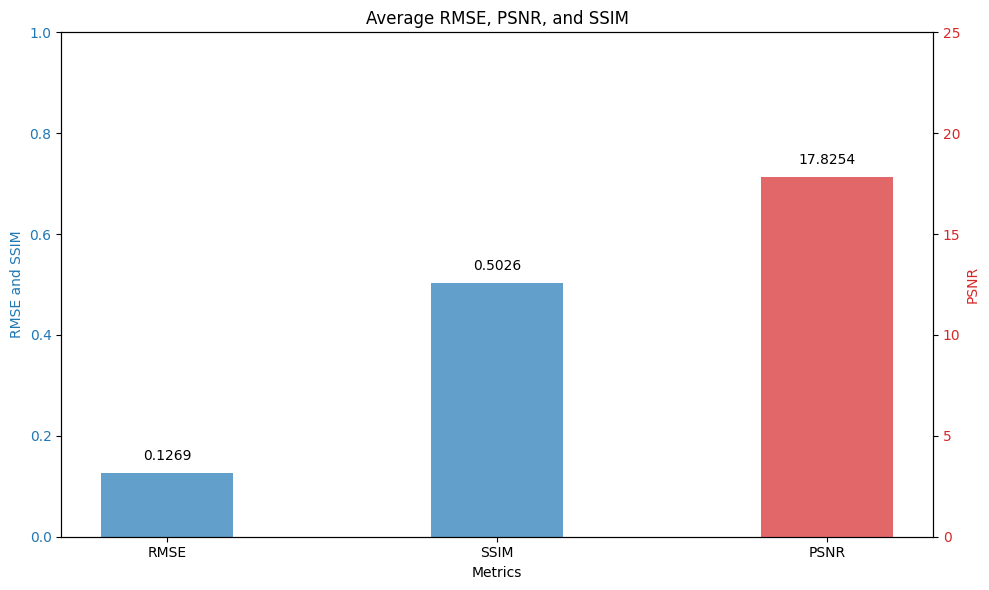

In [25]:
# Metrics and their values
metrics = ['RMSE', 'SSIM']
values_left = [average_rmse, average_ssim]
values_right = [average_psnr]

# Plotting the bar plot with RMSE and SSIM on the left y-axis and PSNR on the right y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE and SSIM on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Metrics')
ax1.set_ylabel('RMSE and SSIM', color=color)
bars1 = ax1.bar([0, 1], values_left, color=color, alpha=0.7, width=0.4, label=['RMSE', 'SSIM'])
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['RMSE', 'SSIM', 'PSNR'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)  # Setting y-axis limit for RMSE and SSIM

# Adding the exact values on top of RMSE and SSIM bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Create another y-axis for PSNR on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PSNR', color=color)
bars2 = ax2.bar(2, values_right, color=color, alpha=0.7, width=0.4, label='PSNR')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 20)  # Setting y-axis limit for PSNR

# Adding the exact value on top of the PSNR bar
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Title and layout adjustments
plt.title('Average RMSE, PSNR, and SSIM')
fig.tight_layout()  # To ensure everything fits without overlapping

# Show the plot
plt.show()

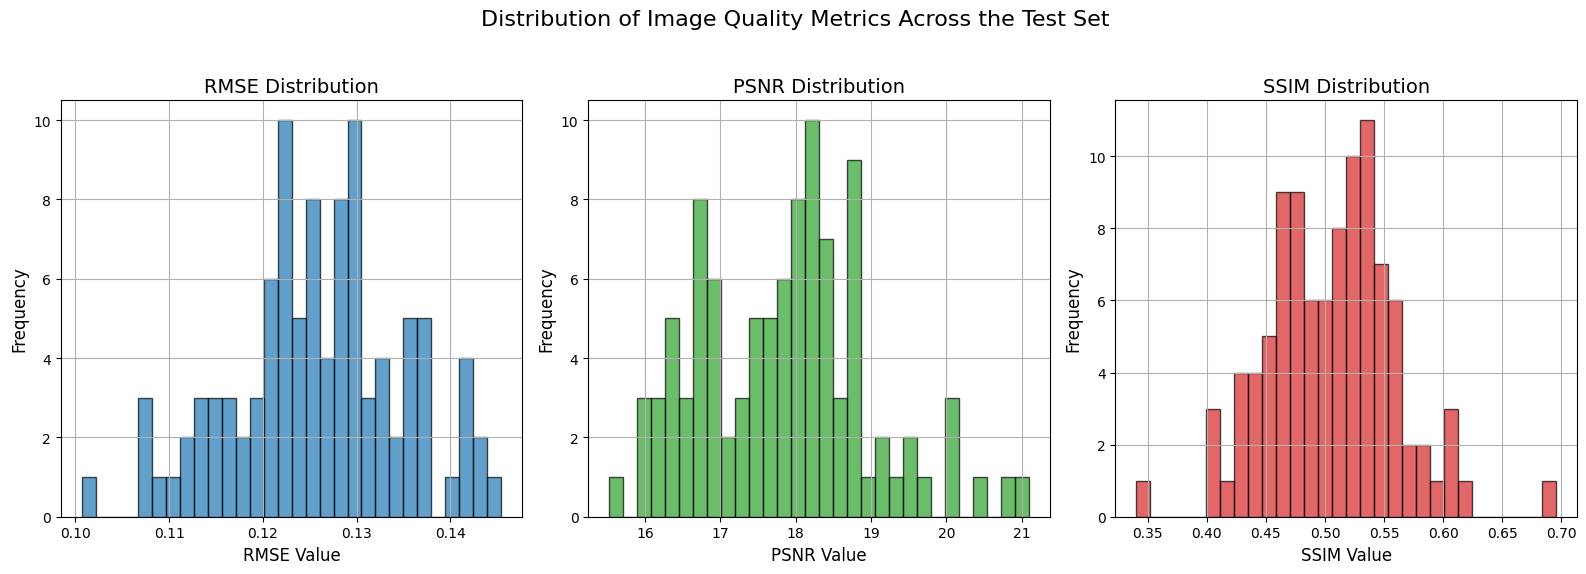

In [27]:
import matplotlib.pyplot as plt

# Assuming rmse_values, psnr_values, and ssim_values are already calculated
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Distribution of Image Quality Metrics Across the Test Set', fontsize=16)

# Define colors
colors = ['#1f77b4', '#2ca02c', '#d62728']

# RMSE Histogram
axes[0].hist(rmse_values, bins=30, color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_title('RMSE Distribution', fontsize=14)
axes[0].set_xlabel('RMSE Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True)

# PSNR Histogram
axes[1].hist(psnr_values, bins=30, color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_title('PSNR Distribution', fontsize=14)
axes[1].set_xlabel('PSNR Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)

# SSIM Histogram
axes[2].hist(ssim_values, bins=30, color=colors[2], alpha=0.7, edgecolor='black')
axes[2].set_title('SSIM Distribution', fontsize=14)
axes[2].set_xlabel('SSIM Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


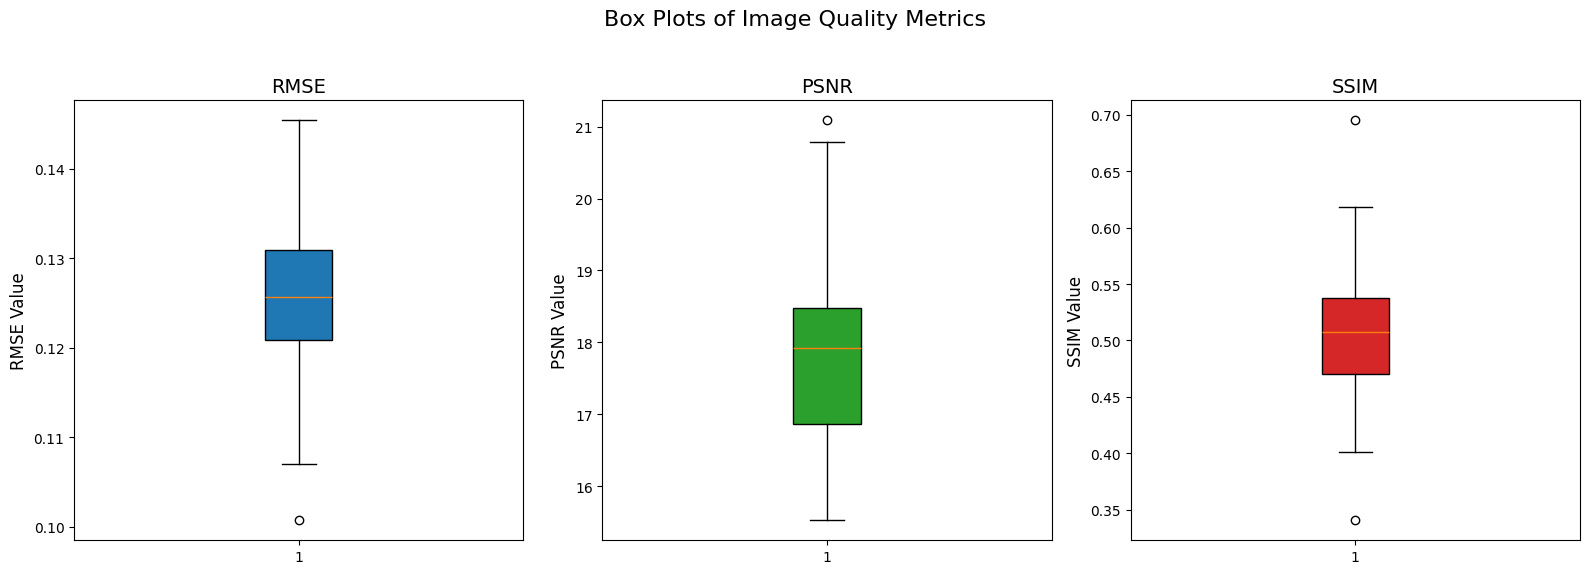

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Box Plots of Image Quality Metrics', fontsize=16)

colors = ['#1f77b4', '#2ca02c', '#d62728']


axes[0].boxplot(rmse_values, patch_artist=True, boxprops=dict(facecolor=colors[0]))
axes[0].set_title('RMSE', fontsize=14)
axes[0].set_ylabel('RMSE Value', fontsize=12)

axes[1].boxplot(psnr_values, patch_artist=True, boxprops=dict(facecolor=colors[1]))
axes[1].set_title('PSNR', fontsize=14)
axes[1].set_ylabel('PSNR Value', fontsize=12)

axes[2].boxplot(ssim_values, patch_artist=True, boxprops=dict(facecolor=colors[2]))
axes[2].set_title('SSIM', fontsize=14)
axes[2].set_ylabel('SSIM Value', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


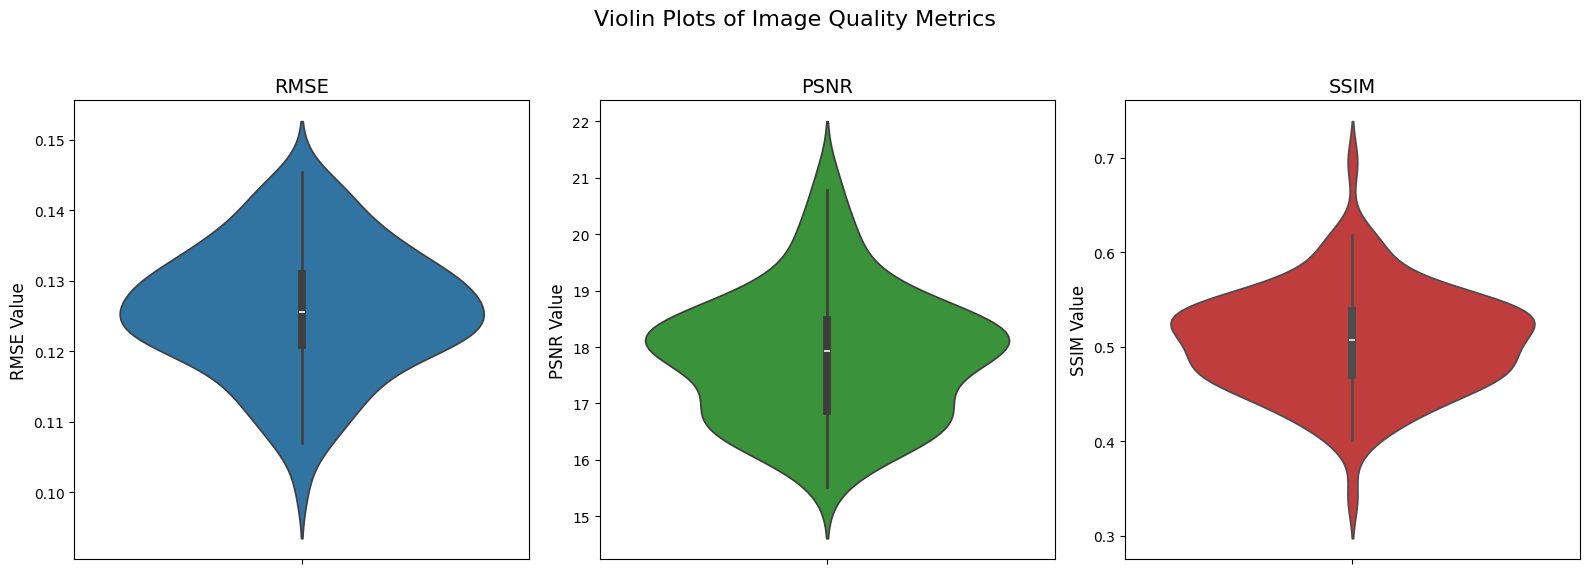

In [29]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Violin Plots of Image Quality Metrics', fontsize=16)

sns.violinplot(ax=axes[0], data=rmse_values, color=colors[0])
axes[0].set_title('RMSE', fontsize=14)
axes[0].set_ylabel('RMSE Value', fontsize=12)

sns.violinplot(ax=axes[1], data=psnr_values, color=colors[1])
axes[1].set_title('PSNR', fontsize=14)
axes[1].set_ylabel('PSNR Value', fontsize=12)

sns.violinplot(ax=axes[2], data=ssim_values, color=colors[2])
axes[2].set_title('SSIM', fontsize=14)
axes[2].set_ylabel('SSIM Value', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


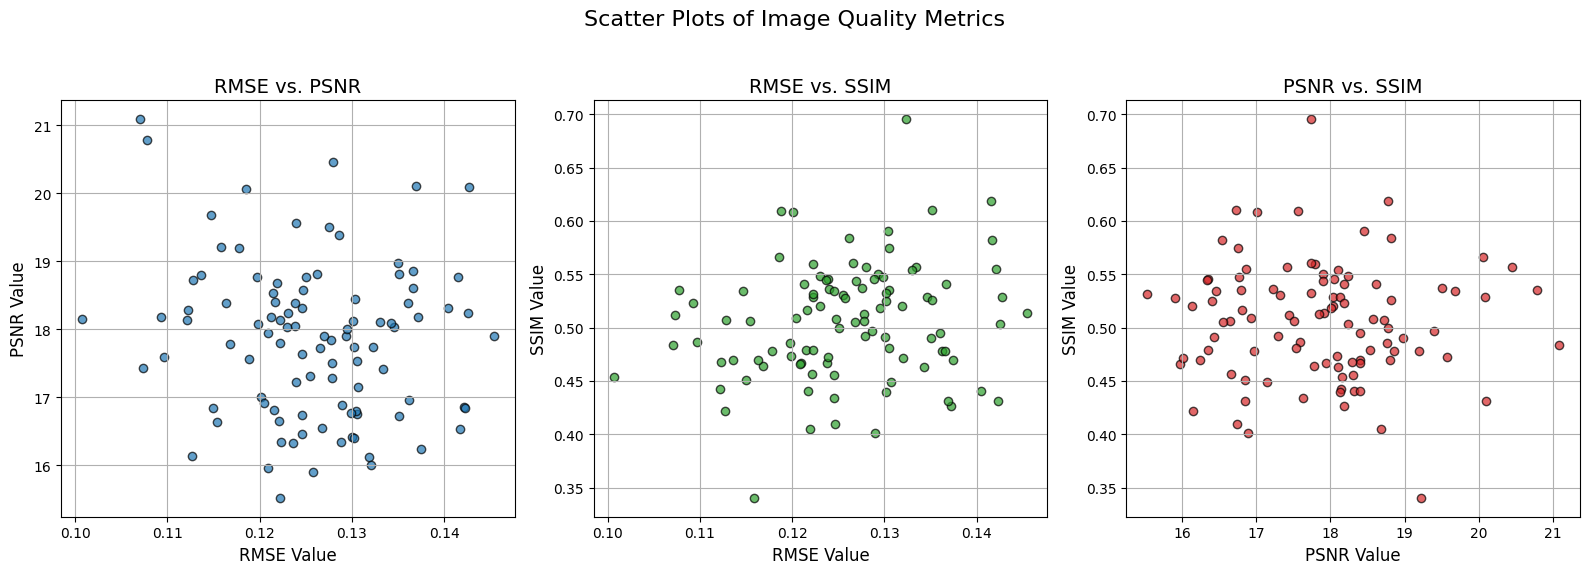

In [31]:
# Chart 3: Scatter Plots of RMSE vs PSNR, RMSE vs SSIM, PSNR vs SSIM
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Scatter Plots of Image Quality Metrics', fontsize=16)

axes[0].scatter(rmse_values, psnr_values, color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_title('RMSE vs. PSNR', fontsize=14)
axes[0].set_xlabel('RMSE Value', fontsize=12)
axes[0].set_ylabel('PSNR Value', fontsize=12)
axes[0].grid(True)

axes[1].scatter(rmse_values, ssim_values, color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_title('RMSE vs. SSIM', fontsize=14)
axes[1].set_xlabel('RMSE Value', fontsize=12)
axes[1].set_ylabel('SSIM Value', fontsize=12)
axes[1].grid(True)

axes[2].scatter(psnr_values, ssim_values, color=colors[2], alpha=0.7, edgecolor='black')
axes[2].set_title('PSNR vs. SSIM', fontsize=14)
axes[2].set_xlabel('PSNR Value', fontsize=12)
axes[2].set_ylabel('SSIM Value', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


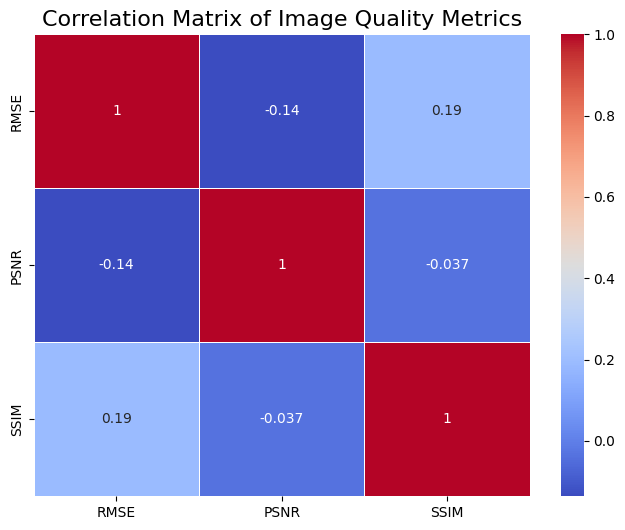

In [32]:
import seaborn as sns
import pandas as pd

data = {'RMSE': rmse_values, 'PSNR': psnr_values, 'SSIM': ssim_values}
df = pd.DataFrame(data)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Image Quality Metrics', fontsize=16)
plt.show()


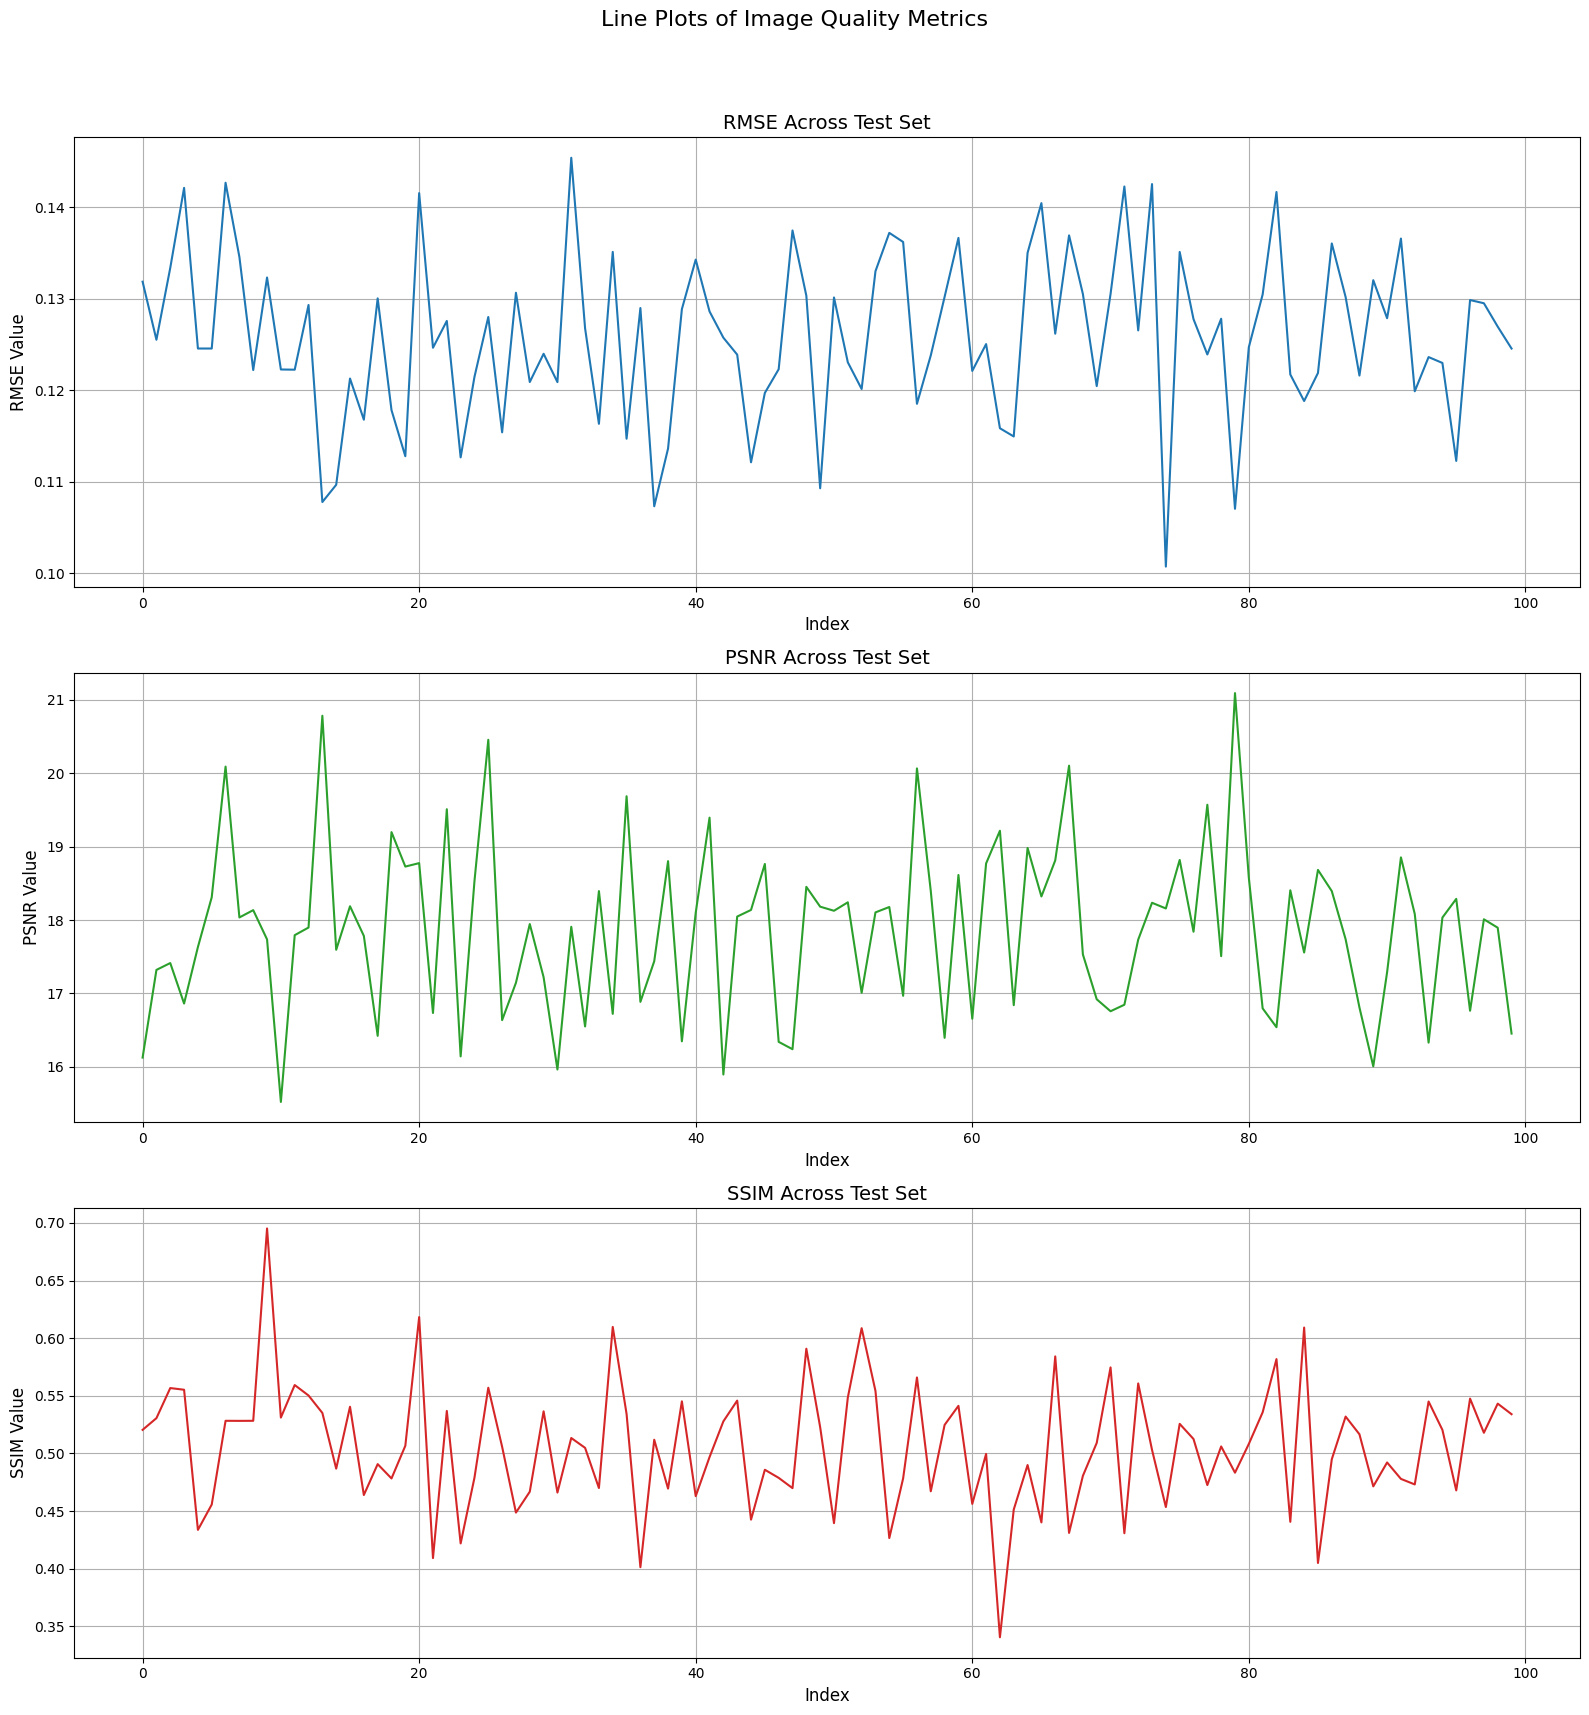

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18))
fig.suptitle('Line Plots of Image Quality Metrics', fontsize=16)

axes[0].plot(rmse_values, color=colors[0])
axes[0].set_title('RMSE Across Test Set', fontsize=14)
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('RMSE Value', fontsize=12)
axes[0].grid(True)

axes[1].plot(psnr_values, color=colors[1])
axes[1].set_title('PSNR Across Test Set', fontsize=14)
axes[1].set_xlabel('Index', fontsize=12)
axes[1].set_ylabel('PSNR Value', fontsize=12)
axes[1].grid(True)

axes[2].plot(ssim_values, color=colors[2])
axes[2].set_title('SSIM Across Test Set', fontsize=14)
axes[2].set_xlabel('Index', fontsize=12)
axes[2].set_ylabel('SSIM Value', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
